In [1]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from scipy import signal
import scipy.fftpack as fftpack
from scipy.fftpack import fftfreq
import matplotlib.pyplot as plt
import os
import math
import cv2 as cv
from skimage import data, color, io, img_as_float
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from scipy.ndimage.morphology import binary_dilation, binary_erosion
from skimage.feature import canny
from scipy.signal import blackman
from tifffile import imread
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.fftpack import fft
from plot_utils import multiplot
from matplotlib.colors import LogNorm
from skimage.filters import threshold_mean, sobel
from skimage.filters import threshold_otsu, threshold_local
from skimage import feature
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from HoughLine import show_hough_linetransform, show_ransac_points_line
from plot_utils import multiplotlineX

# Input the data, size and Time period measured

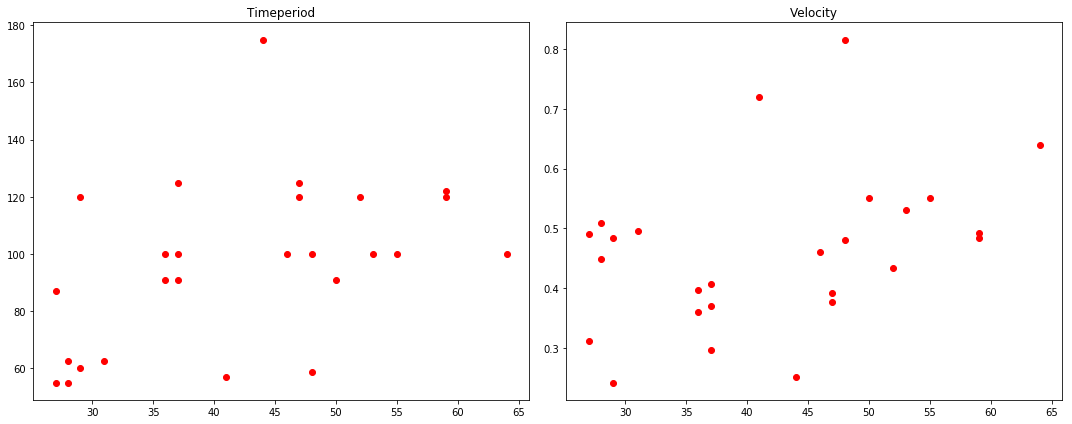

In [2]:
Size = [48,36,37,36,37,41,47,52,29,47,50,55,59,27,28,28,29,31,48,53,64,27,37,44,46,59]
TimePeriod = [58.82,100,100,90.9,90.9,56.95,125,120,120,120,90.9,100,122,55,62.5,55,60,62.5,100,100,100,86.9,125,175,100,120]


Velocity = []
for i in range(len(Size)):
 Velocity.append(Size[i]/TimePeriod[i])

multiplotlineX(TimePeriod, Velocity, Size,  'Timeperiod', 'Velocity')



# Use Ransac with a user defined residual_threshold to obtain the line fit on Timeperiod versus Size

Slope =  0.0
Normal Slope =  2.823684170809063


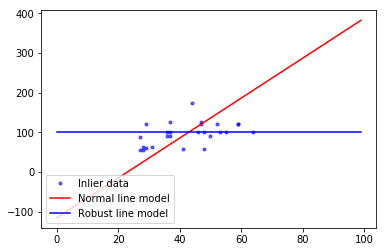

In [3]:
Size_time = np.column_stack([Size, TimePeriod])

show_ransac_points_line(Size_time, min_samples=2, residual_threshold=0.05, max_trials=1000)

# Use Ransac to fit the line on Velocity vs size plot

Slope =  0.009900000000000006
Normal Slope =  0.00717656552755896


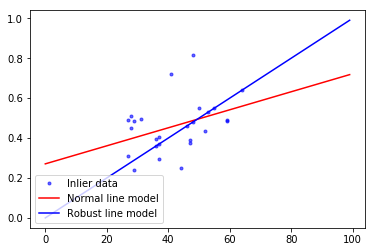

In [4]:

Size_time = np.column_stack([Size, Velocity])

show_ransac_points_line(Size_time, min_samples=2, residual_threshold=0.01, max_trials=1000)